## Tarea 1
### Tablero de ajedrez monocromo
Para realizar esta tarea compruebo que la suma del resultado de dividir ambos punteros del bucle entre 20 que es el salto y así compruebo después que ambos ejes son pares

In [1]:
import numpy as np
import matplotlib.pyplot as plt

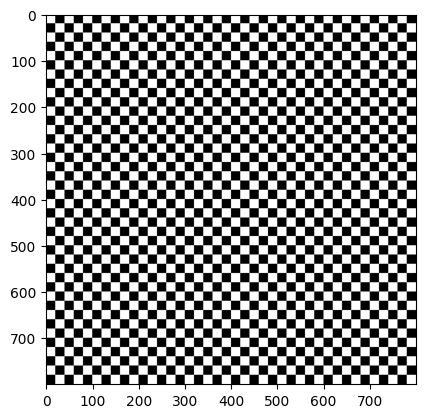

In [2]:
alto, ancho = 800, 800
gris_img = np.zeros((alto,ancho,1), dtype = np.uint8)
for y in range(0, 800, 20):
    for x in range(0, 800, 20):
        if (x//20 + y//20) % 2 == 0:
            gris_img[y:y+20, x:x+20] = 255  # blanco

plt.imshow(gris_img, cmap='gray') 
plt.show()

### Tarea 2
## Imagen tipo Mondrian

Se crea una composición abstracta con bloques de colores primarios (rojo, azul, amarillo) y blanco, separados por líneas negras gruesas, siguiendo el estilo geométrico de Piet Mondrian.

In [ ]:
import cv2  
import matplotlib.pyplot as plt
import numpy as np

In [6]:
color_img=np.zeros((alto,ancho,3),dtype=np.uint8)

cv2.rectangle(color_img,(5,5),(ancho-2,int(alto/4)),(255,255,255),-1)
cv2.rectangle(color_img,(5,5),(ancho-2,int(alto/4)),(0,0,0),5)

cv2.rectangle(color_img,(0,200),(300,300),(255,0,0),-1)
cv2.rectangle(color_img,(0,  200),(300 ,300),(0,0,0),5)

cv2.rectangle(color_img,(0,200),(300,300),(255,0,0),-1)
cv2.rectangle(color_img,(0,200),(300, 300),(0,0,0), 5)

cv2.rectangle(color_img,(320, 220),(600  ,350),(255,255,0), -1)
cv2.rectangle(color_img,(320,220),(600,350),(0,0,0),5)

cv2.rectangle(color_img,(620,100),(780, 300),(0,0,255),-1)
cv2.rectangle(color_img,(620,100),(780,300),(0,0,0),5)

cv2.line(color_img,(0 , 400),(ancho,400),(0,0,0),10)

cv2.line(color_img,(400,0),(400 ,alto),(0,0,0),10)

cv2.rectangle(color_img,(20, 420),(250,600),(255,255,255),-1)
cv2.rectangle(color_img,(20,420),(250,600),(0,0,0),5)

cv2.rectangle(color_img,(550,500),(780 ,750),(255,0,0),-1)
cv2.rectangle(color_img,(550,500),(780,750),(0,0,0),5)

cv2.rectangle(color_img,(300,600),(500,780),(0,0,255), -1)
cv2.rectangle(color_img,(300,600),(500,780),(0,0,0),  5)

cv2.rectangle(color_img,(50,50),(180,150),(255,255,0), -1)
cv2.rectangle(color_img,(50,50),(180,150),(0,0,0), 5)

cv2.line(color_img,(0,600),(ancho,600),(0,0,0), 10)

cv2.line(color_img,(200,0),(200, alto),(0,0,0),10)

plt.imshow(color_img)
plt.show()


NameError: name 'alto' is not defined

## Tarea 3
### Modificar Libremente los valores de un plano de la imagen
En esta tarea superpongo el logo de la ulpgc al la fuente de la camara mostrando el video a color y manteniendo el color que "debería" ser en el resto

In [1]:
import cv2  
import numpy as np

In [4]:
vid = cv2.VideoCapture(0)
img = cv2.imread('logo_ulpgc_vertical_acronimo_mancheta_azul.png')
watermark = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

ret, frame = vid.read()
h_frame, w_frame, c = frame.shape

# Redimensionar watermark al tamaño del frame
watermark_resized = cv2.resize(watermark, (w_frame, h_frame))
_, mask = cv2.threshold(watermark_resized, 127, 255, cv2.THRESH_BINARY)
mask_bool = mask.astype(bool)

while True:
    ret, frame = vid.read()
    if not ret:
        break

    # Separar canales1
    b, g, r = cv2.split(frame)

    # Crear imágenes RGB por canal
    r_color = np.zeros_like(frame)
    r_color[:,:,2] = r
    g_color = np.zeros_like(frame)
    g_color[:,:,1] = g
    b_color = np.zeros_like(frame)
    b_color[:,:,0] = b

    # Collage horizontal
    collage_color = np.hstack((r_color, g_color, b_color))

    # Expandir máscara y frame para coincidir con el collage
    mask_expanded = np.hstack((mask_bool, mask_bool, mask_bool))
    frame_expanded = np.hstack((frame, frame, frame))

    # Aplicar máscara: donde es blanca, mostrar el vídeo a color
    collage_color[mask_expanded] = frame_expanded[mask_expanded]

    cv2.imshow('RGB', cv2.resize(collage_color, (int(w_frame*1.5), int(h_frame/2)), cv2.INTER_NEAREST))

    if cv2.waitKey(20) & 0xFF == 27:
        break

vid.release()
cv2.destroyAllWindows()


## Tarea 4
### Pintar círculos en los píxeles más claro y más oscuro
Se captura una imagen desde la cámara y se analiza su intensidad luminosa. Se identifican el píxel más claro y el más oscuro, y se dibujan círculos sobre ellos para destacarlos visualmente.

In [2]:
import cv2
import numpy as np

In [8]:
vid = cv2.VideoCapture(0)

while True:
    ret, frame = vid.read()
    if ret:
        alto, ancho = frame.shape[:2]

        #Crear imagen en escala de grises
        gris_img = np.zeros((alto, ancho, 1), dtype=np.uint8)

        # Calcular intensidad manualmente usando fórmula deluminancia
        gris_img[:,:,0] = (0.299 * frame[:,:,2] + 0.587 * frame[:,:,1] + 0.114 * frame[:,:,0]).astype(np.uint8)

        # buscar píxel más claro y más oscuro
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(gris_img[:, :, 0])

        # Dibujar circulos
        cv2.circle(frame, min_loc, 10, (255,0,0), -1)     # Azul: más oscuro
        cv2.circle(frame, max_loc, 10, (0,255, 255),-1)   # Amarillo: más claro
        cv2.imshow('Cam', frame)

    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break

# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()



## Tarea 5
### LLevar a cabo tarea de POP art 
Creo un callage con tres videos:
1. Colores predominantes rojo y amarillo aplicando threshold.
2. Colores predominantes azul y lila buscando el punto en comun entre el rojo y el verde y reorganizandolos.
3. Colores predominantes verde y amarillo recolocando las capas de color.<


Inspiración obtenida de los colores análogos de la gama cromática

In [ ]:
import cv2  
import numpy as np

In [3]:
vid = cv2.VideoCapture(0)
thresh_value_R = 100
thresh_value_G = 150
thresh_value_B = 200
while True:
    ret, frame = vid.read()
    h_frame, w_frame, c = frame.shape
    if not ret:
        break
    
    _, vid1R = cv2.threshold(frame[:,:,2], thresh_value_R, 255, cv2.THRESH_BINARY)  # R
    _, vid1G = cv2.threshold(frame[:,:,1], thresh_value_G, 255, cv2.THRESH_BINARY)  # G
    _, vid1B = cv2.threshold(frame[:,:,0], thresh_value_B, 255, cv2.THRESH_BINARY)  # B
    vid1 = cv2.merge((vid1B, vid1G, vid1R))

   # Umbral por canal
    _, vid2R = cv2.threshold(frame[:,:,2], thresh_value_R, 255, cv2.THRESH_BINARY)  # R 
    _, vid2G = cv2.threshold(frame[:,:,1], thresh_value_G, 255, cv2.THRESH_BINARY)  # G 
    _, vid2B = cv2.threshold(frame[:,:,0], thresh_value_B, 255, cv2.THRESH_BINARY)  # B 

# Crear canales de salida según mapeo
    outR = vid2B                       
    outG = vid2R & vid2G               
    outB = vid2R                     

    vid_colored = cv2.merge((outB, outG, outR))

# Combinar canales en imagen final
    vid2 = cv2.merge((outB, outR, outG))

    _, vid3R = cv2.threshold(frame[:,:,2], thresh_value_R, 255, cv2.THRESH_BINARY)  # R
    _, vid3G = cv2.threshold(frame[:,:,1], thresh_value_G, 255, cv2.THRESH_BINARY)  # G
    _, vid3B = cv2.threshold(frame[:,:,0], thresh_value_B, 255, cv2.THRESH_BINARY)  # B
    vid3 = cv2.merge((vid3B, vid3R, vid3G))


    collage = np.hstack((vid1, vid2, vid3))
    cv2.imshow('RGB', cv2.resize(collage, (int(w_frame*1.5), int(h_frame/2)), cv2.INTER_NEAREST))

    if cv2.waitKey(20) & 0xFF == 27:
        break

vid.release()
cv2.destroyAllWindows()